### Color Histogram


Top three colors (RGB): [(232, 232, 216), (248, 232, 216), (248, 232, 232)]


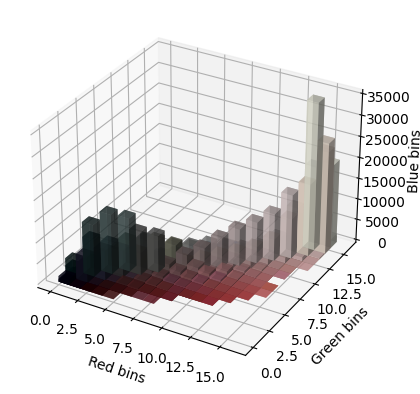

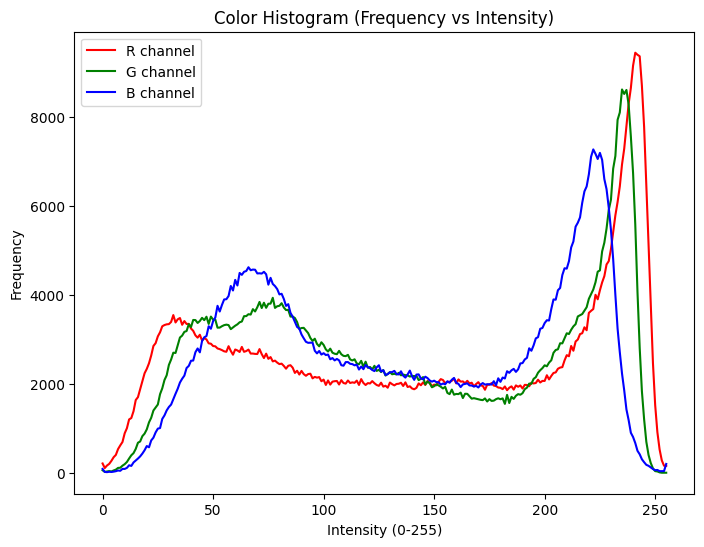

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_three_primary_colors(image_path, bins=64):
    """
    Loads the image, calculates a color histogram with 'bins' bins per channel,
    and returns the top three colors in (R, G, B).
    """
    # Load and convert image to RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate 3D histogram over bins x bins x bins
    hist = cv2.calcHist([image], [0,1,2], None, [bins,bins,bins], [0,256,0,256,0,256])
    hist_flat = hist.flatten()

    # Sort histogram indices by descending frequency
    top_3_indices = np.argsort(hist_flat)[::-1][:3]
    top_3_bins_3d = [np.unravel_index(idx, (bins,bins,bins)) for idx in top_3_indices]
    
    # Convert bin indices to approximate RGB values
    colors = []
    for r_bin, g_bin, b_bin in top_3_bins_3d:
        r_val = int((r_bin + 0.5) * (256 / bins))
        g_val = int((g_bin + 0.5) * (256 / bins))
        b_val = int((b_bin + 0.5) * (256 / bins))
        colors.append((r_val, g_val, b_val))
    return colors, hist

def plot_histogram_3d(hist):
    """
    Plots a simple 3D bar chart for the histogram, labeling axes for clarity.
    """
    bins = hist.shape[0]
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # Each axis in 'hist' corresponds to R, G, B, so we iterate over each bin combination
    for r in range(bins):
        for g in range(bins):
            for b in range(bins):
                height = hist[r,g,b]
                if height > 0:
                    # Scale color slightly for visualization
                    ax.bar3d(r, g, b, 1, 1, height, 
                             color=(r/(bins-1), g/(bins-1), b/(bins-1)), alpha=0.6)
    ax.set_xlabel('Red bins')
    ax.set_ylabel('Green bins')
    ax.set_zlabel('Blue bins')
    plt.show()
    
def plot_histogram_2d(image_path):
    """
    Reads an image and plots three separate 2D histograms 
    (one for each color channel: R, G, B).
    """
    image = cv2.imread(image_path)
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split into channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # For each channel, compute histogram with 256 bins (0-255)
    r_hist = cv2.calcHist([r_channel],[0],None,[256],[0,256])
    g_hist = cv2.calcHist([g_channel],[0],None,[256],[0,256])
    b_hist = cv2.calcHist([b_channel],[0],None,[256],[0,256])

    # Plot the histograms
    plt.figure(figsize=(8,6))
    plt.plot(r_hist, color='r', label='R channel')
    plt.plot(g_hist, color='g', label='G channel')
    plt.plot(b_hist, color='b', label='B channel')
    plt.title('Color Histogram (Frequency vs Intensity)')
    plt.xlabel('Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    image_path = "C:/Biography\ArtEmotionalPalette-AI/images_jpg/4.jpg"
    top_colors, histogram = get_three_primary_colors(image_path, bins=16)
    print("Top three colors (RGB):", top_colors)
    plot_histogram_3d(histogram)
    plot_histogram_2d(image_path)
    
    
    # 142,127,130 -  54,60,64 - 226,218,210